In [2]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
from funcs import *
from robotClass import *

import time
import numpy as np
import matplotlib.pyplot as plt
import asyncio

LOG.propagate = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Lab 9

In [4]:
# Setup robot
rc = setupRobot()

2022-04-13 14:59:15,179 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:83:B0:6C:9A:3C
2022-04-13 14:59:18,032 | INFO     |: Connected to C0:83:B0:6C:9A:3C


In [42]:
rc.pingRobot(clear = True)
rc.updatePID(20, 50, 10, 0, 1, 2, 90)
#rc.move_forward([255, 255], 0, 1)

# Wait one second
await asyncio.sleep(50)

rc.stop()
rc.pingRobot(clear = False)

In [37]:
rc.imu_readings

[(-2493.541259765625, 1649877084.657772),
 (-2516.9931640625, 1649877086.712121),
 (-2538.022705078125, 1649877088.903797),
 (-2569.221923828125, 1649877090.958226),
 (-2587.206298828125, 1649877093.102638),
 (-2608.306884765625, 1649877095.128584),
 (-2634.806396484375, 1649877097.4230459),
 (-2676.71044921875, 1649877099.448119),
 (-2694.49853515625, 1649877101.637526),
 (-2718.474609375, 1649877103.663132),
 (-2734.23681640625, 1649877105.883109),
 (-2757.27099609375, 1649877107.9525208),
 (-2773.724609375, 1649877110.112996),
 (-2791.580322265625, 1649877112.212308),
 (-2810.486328125, 1649877114.446439),
 (-2831.395263671875, 1649877116.532615),
 (-2848.24560546875, 1649877118.6469052),
 (-2864.2197265625, 1649877120.642335),
 (-2885.824951171875, 1649877122.861042),
 (-2916.871337890625, 1649877124.886813),
 (-2933.757568359375, 1649877127.061995),
 (-2949.119384765625, 1649877129.087163),
 (-2964.899169921875, 1649877131.2615),
 (-2980.376220703125, 1649877133.331379)]

In [38]:
rc.tof_readings

[(119.0, 1649877084.6432781),
 (169.0, 1649877086.6975),
 (129.0, 1649877088.90337),
 (101.0, 1649877090.9435189),
 (102.0, 1649877093.1022248),
 (393.0, 1649877095.128206),
 (437.0, 1649877097.4080791),
 (493.0, 1649877099.432228),
 (412.0, 1649877101.622279),
 (272.0, 1649877103.662807),
 (267.0, 1649877105.868237),
 (322.0, 1649877107.937143),
 (338.0, 1649877110.1125681),
 (435.0, 1649877112.211984),
 (431.0, 1649877114.4170392),
 (119.0, 1649877116.5160441),
 (124.0, 1649877118.631694),
 (141.0, 1649877120.641838),
 (179.0, 1649877122.8463411),
 (96.0, 1649877124.872989),
 (114.0, 1649877127.061625),
 (94.0, 1649877129.086931),
 (95.0, 1649877131.261246),
 (400.0, 1649877133.317743)]

In [46]:
trial = 2

"""
Location

0: (-3,-2)
1: (0,0)
2: (5,3)
3: (5,-3)
4: (0,3)
"""
location = 0

In [44]:
rc.imu_readings # gyroscope values
storeData(rc.imu_readings, f'data/gyroscopeValues_t{trial}_{location}.txt')

In [61]:
x = processRunData(f'data/gyroscopeValues_t{trial}_{location}.txt')

In [45]:
rc.tof_readings # front ToF sensor values
storeData(rc.tof_readings, f'data/TOFValues_t{trial}_{location}.txt')

2022-04-13 15:15:25,106 | INFO     |: Disconnected from 607452C2-8441-D076-814E-841EB3635426


In [62]:
y = processRunData(f'data/TOFValues_t{trial}_{location}.txt')

In [75]:
gyroData = [val[0] % 360 for val in x[:12]]
tofData = y[:12]

In [79]:
tofData

[[74.0, 0],
 [306.0, 2.2203011512756348],
 [373.0, 4.28931999206543],
 [485.0, 6.405422210693359],
 [592.0, 8.549658060073853],
 [620.0, 10.664210319519043],
 [377.0, 12.734815120697021],
 [336.0, 14.88020920753479],
 [324.0, 16.94981598854065],
 [392.0, 19.123985290527344],
 [488.0, 21.120379209518433],
 [486.0, 23.325072050094604]]

In [174]:
def polarPlot(gyroData, tofData, numValues = 12):
    x = [ val[0] % 360 for val in gyroData[:numValues] ]
    y = [ val[0] for val in tofData[:numValues] ]

    fig = plt.figure()
    ax = fig.add_subplot(projection = 'polar')

    ax.plot(x, y)
    plt.show()
    
    return [x, y]

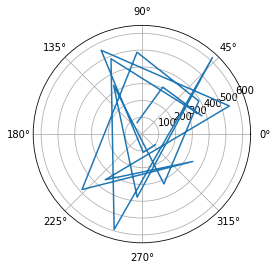

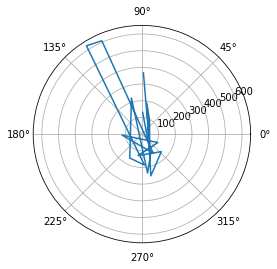

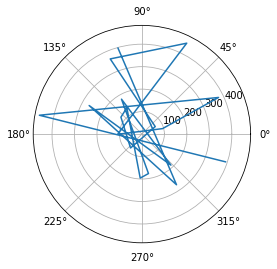

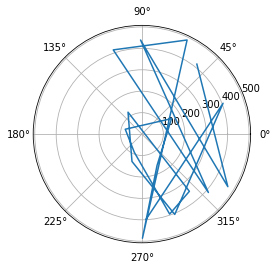

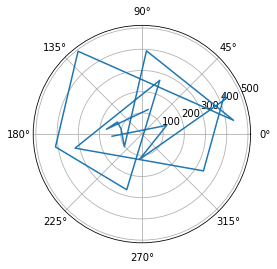

In [227]:
trial = 2
combinedData = []

for location in range(5):
    data1 = processRunData(f'data/gyroscopeValues_t{trial}_{location}.txt')
    data2 = processRunData(f'data/TOFValues_t{trial}_{location}.txt')

    combinedData += [polarPlot(data1, data2, 18)]

In [228]:
locationMap = {
    0: (-3,-2),
    1: (0,0),
    2: (5,3),
    3: (5,-3),
    4: (0,3)
}

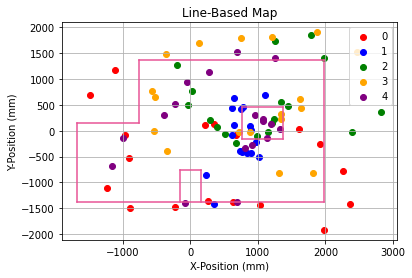

In [246]:
posValues = []
tileLength = 300
colors = ['red', 'blue', 'green', 'orange', 'purple']

for i in range(len(combinedData)):
    
    gyro, tof = combinedData[i]
    
    runData = []

    for j in range(len(tof)):
        thetha = gyro[j]
        r = tof[j]
        
        if i == 1:
            runData += [ [ 1 * r * np.cos(np.radians(thetha)) + locationMap[i][0] * 4 * tileLength + 800 , 3.5 * r * np.sin(np.radians(thetha)) + locationMap[i][0] * 0.25 * tileLength + 0] ]
        else:
            runData += [ [ 4 * r * np.cos(np.radians(thetha)) + locationMap[i][0] * 0.25 * tileLength + 650 , 3.5 * r * np.sin(np.radians(thetha)) + locationMap[i][0] * 0.25 * tileLength + 0] ]
    
    posValues += [ runData ]

    
fig, ax = plt.subplots()

for i in range(len(posValues)):
    xVals, yVals = [val[0] for val in posValues[i] ], [ val[1] for val in posValues[i] ]
    ax.scatter(xVals, yVals, c = colors[i], label = i)
                    
                    
ax.legend()
ax.grid(True)

# Boundaries obtained from lab 10 starter code
world = [ [(-1.6764,0.1524), (-1.6764,-1.3716)], [(-1.6764,-1.3716), (1.9812,-1.3716)], 
          [(1.9812,-1.3716), (1.9812,1.3716)], [(1.9812,1.3716), (-0.7620,1.3716)],
          [(-0.7620,1.3716), (-0.7620,0.1524)], [(-0.7620,0.1524), (-1.6764,0.1524)],
          [(0.7620,-0.1524), (1.3716,-0.1524)], [(1.3716,-0.1524), (1.3716,0.4572)],
          [(1.3716,0.4572), (0.7620,0.4572)], [(0.7620,0.4572), (0.7620,-0.1524)],
          [(-0.1524,-1.3716), (-0.1524,-0.7620)], [(-0.1524,-0.7620), (0.1524,-0.7620)],
          [(0.1524,-0.7620), (0.1524,-1.3716)] ]

for point in world:
    ax.plot([ 1000 * point[0][0], 1000 * point[1][0] ], [ 1000 * point[0][1], 1000 * point[1][1]], color = '#e85395' )

plt.title('Line-Based Map')
plt.xlabel('X-Position (mm)')
plt.ylabel('Y-Position (mm)')
#plt.show()
plt.savefig('lineBasedMap.png')